In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import preprocessing

In [3]:
file = pd.read_pickle("train.pickle")

In [11]:
Yes_rate = file[['STAFF','YES']]
comments = file[['STAFF','total_notes']]

In [23]:
group_count = Yes_rate.groupby('STAFF').count()
group_count.columns = ['yes_count']
group_sum = Yes_rate.groupby("STAFF").sum()
group_sum.columns = ['yes_sum']

In [24]:
group_notes = comments.groupby("STAFF").agg(lambda x: " ".join(x))

In [27]:
new_data = group_notes.join(group_count)
new_data = new_data.join(group_sum)

In [32]:
new_data['yes_rate'] = new_data['yes_sum']/new_data['yes_count']

In [35]:
new_data = new_data.sort_values(by='yes_rate', ascending=False)

In [41]:
#new_data.to_csv("notes_groupby_staff.csv")

In [77]:
#take the five most successful caseworker and compare wtih five worst caseworker

In [88]:
good_dictionary = {}
bad_dictionary = {}
for i in range(60):
    good_note = new_data['total_notes'][i]
    good_note = good_note.split(" ")
    bad_note = new_data['total_notes'][new_data.shape[0]-i-1]
    bad_note = bad_note.split(" ")
    for j in good_note:
        if j not in good_dictionary:
            good_dictionary[j] = 1
        else:
            good_dictionary[j] += 1
    for k in bad_note:
        if k not in bad_dictionary:
            bad_dictionary[k] = 1
        else:
            bad_dictionary[k] += 1
    

In [89]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
for i in bad_dictionary:
    if i.lower() in stopwords:
        bad_dictionary[i] = 0
for i in good_dictionary:
    if i.lower() in stopwords:
        good_dictionary[i] = 0
bad_dic = dict(sorted(bad_dictionary.items(), key=lambda item: item[1], reverse = True)[:100])
good_dic = dict(sorted(good_dictionary.items(), key=lambda item: item[1], reverse = True)[:100])


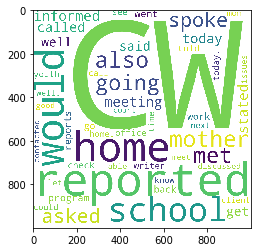

In [93]:
import matplotlib.pylab as plt
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(good_dic)
plt.imshow(wc)

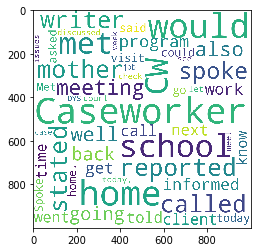

In [94]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bad_dic)
plt.imshow(wc)
